# Demo - Dissimilarity Based Selection Synthetic Data

In this tutorial, we are going to show how the `DiverseSelector` work with 2D synthetic data. Each axis represents one feature. For each example, we will have two different synthetic datasets where the first one can be seen as randomly generated data points and the latter generates data points belonging to different clusters. By using 2D feature data points, it makes visualization easy.

## Generating Synthetic Data

In [23]:
import DiverseSelector
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Generate synthetic data using make_blobs 100 samples, 2 features, 1 cluster
coords, class_labels = make_blobs(n_samples=100, n_features=2, centers=1, random_state=42)
arr_dist = pairwise_distances(coords, metric="euclidean")

# Generate synthetic data using make_blobs 100 samples, 2 features, 3 clusters
coords_cluster, class_labels_cluster = make_blobs(
    n_samples=100, n_features=2, centers=3, random_state=42
)
arr_dist_cluster = pairwise_distances(coords_cluster, metric="euclidean")


def graph_data(coords, selected=None, reference=False):
    plt.figure(dpi=150)
    plt.scatter(coords[:, 0], coords[:, 1])
    if selected:
        for i, mol_id in enumerate(selected):
            plt.scatter(coords[mol_id, 0], coords[mol_id, 1], c="r")
            plt.text(coords[mol_id, 0], coords[mol_id, 1], str(i + 1))
    if reference:
        plt.scatter(coords[0, 0], coords[0, 1], c="black")
    plt.show()

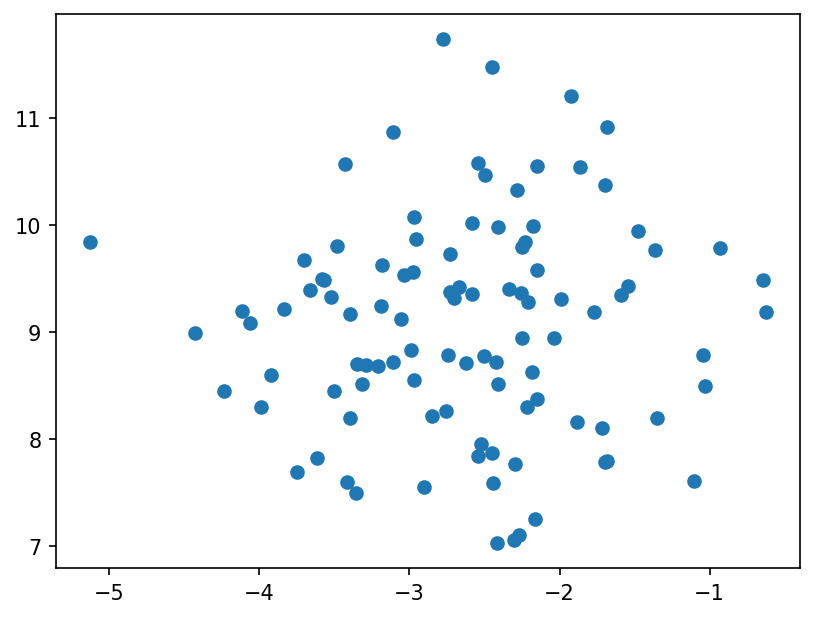

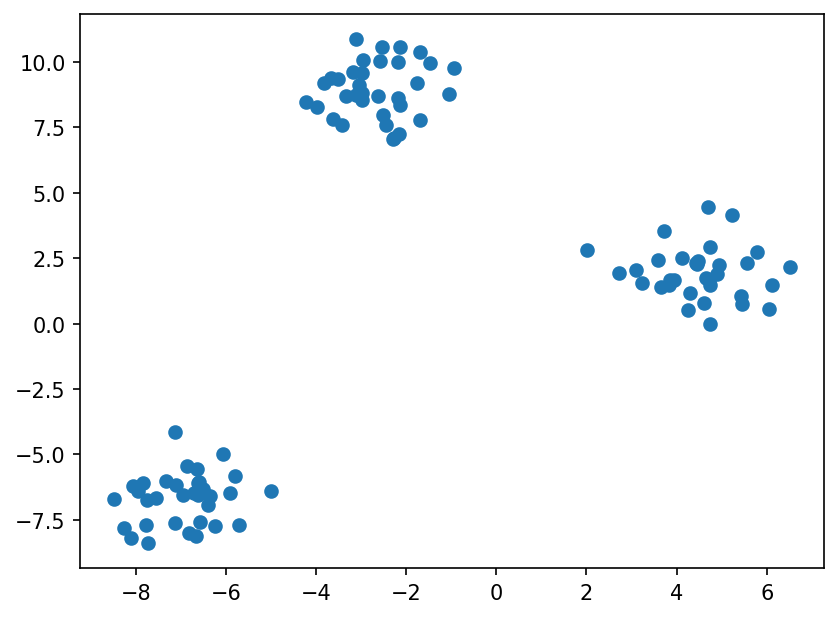

In [25]:
graph_data(coords)
graph_data(coords_cluster)

## Running Dissimilarity Algorithms

### Brute Strength - MaxMin

In [26]:
# MaxMin method
from DiverseSelector import MaxMin, OptiSim, DirectedSphereExclusion, GridPartitioning

# diverse subset selection from randomly generated data points
selector = MaxMin()
selected_ids1 = selector.select(arr=arr_dist, size=12)

# diverse subset selection from data points with obvious patterns (different clusters)
selector = MaxMin()
selected_ids2 = selector.select(arr=arr_dist_cluster, labels=class_labels_cluster, size=12)

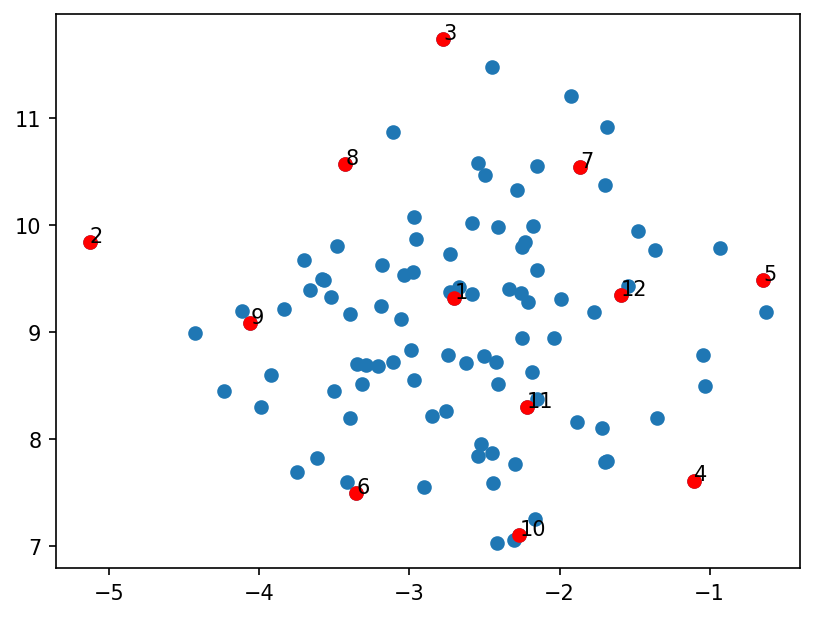

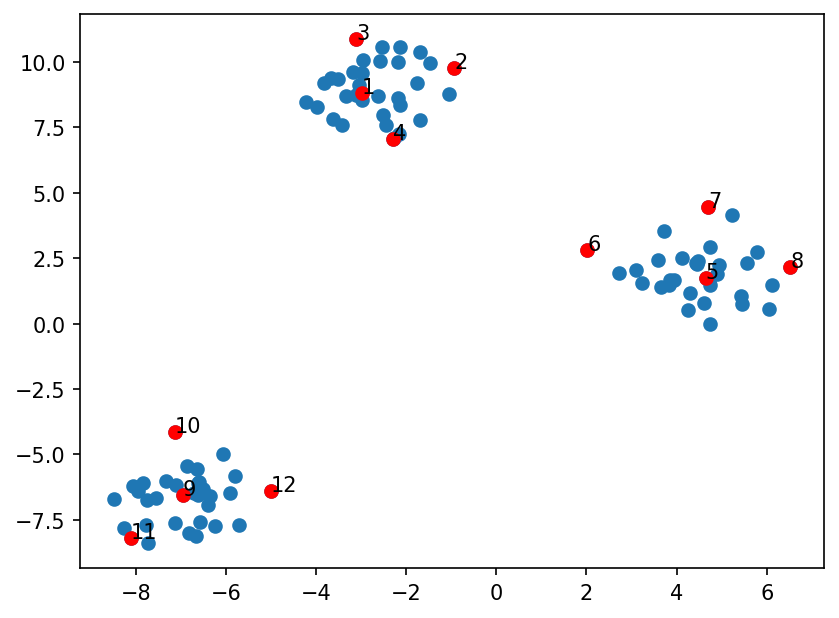

In [27]:
graph_data(coords, selected_ids1)
graph_data(coords_cluster, selected_ids2)

### Adapted Optimizable K-Dissimilarity Selection (OptiSim)

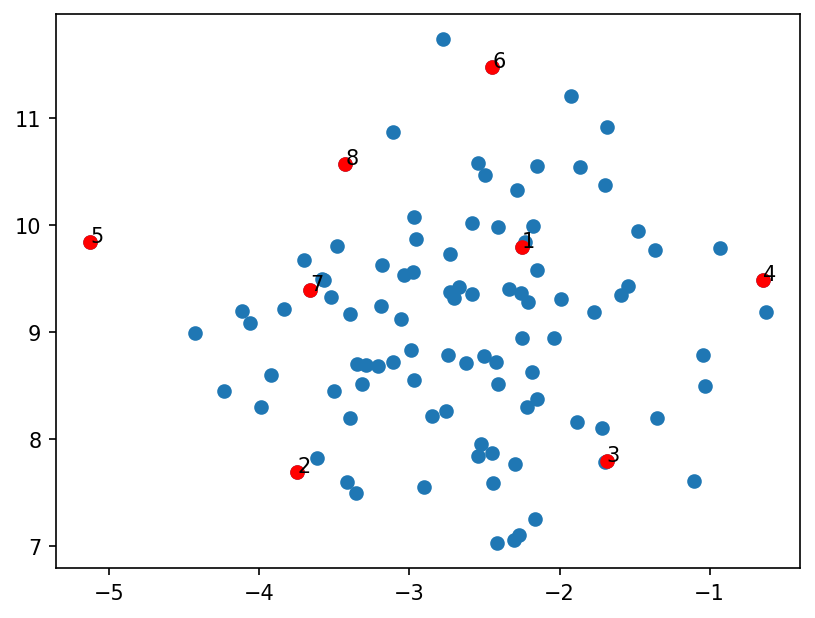

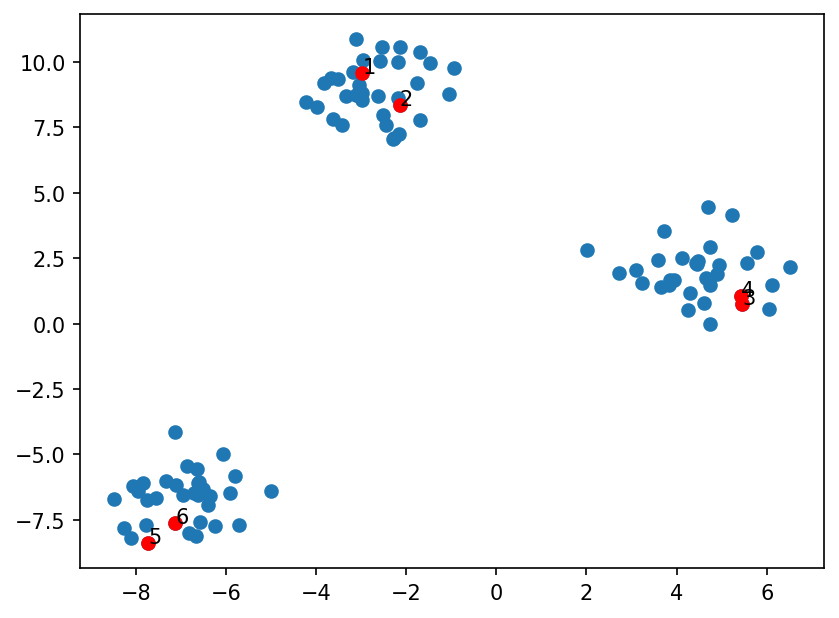

In [28]:
# diverse subset selection from randomly generated data points
selected_id3 = OptiSim().select(coords, 12)
# diverse subset selection from data points with obvious patterns (different clusters)
selected_id4 = OptiSim().select(coords_cluster, size=12, labels=class_labels_cluster)

graph_data(coords, selected_id3)
graph_data(coords_cluster, selected_id4)

### Directed Sphere Exclusion

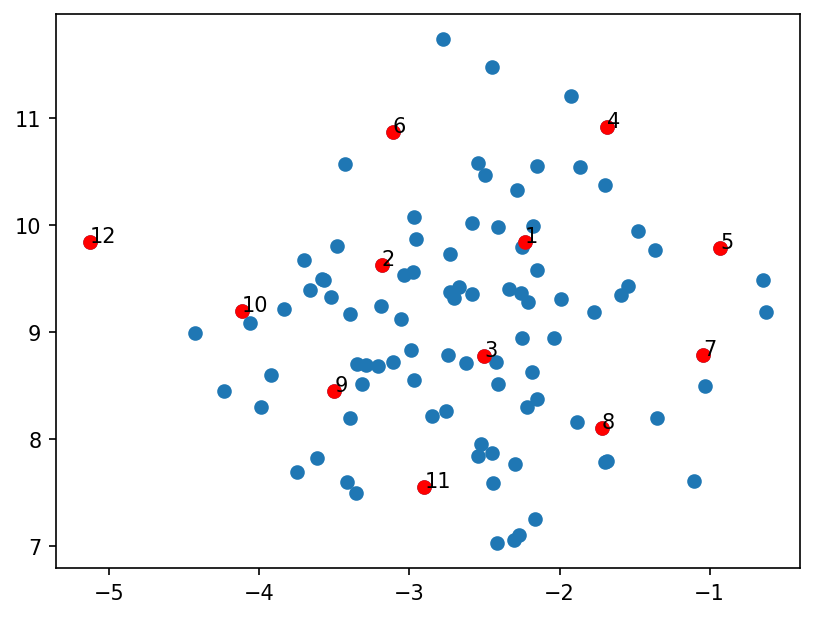

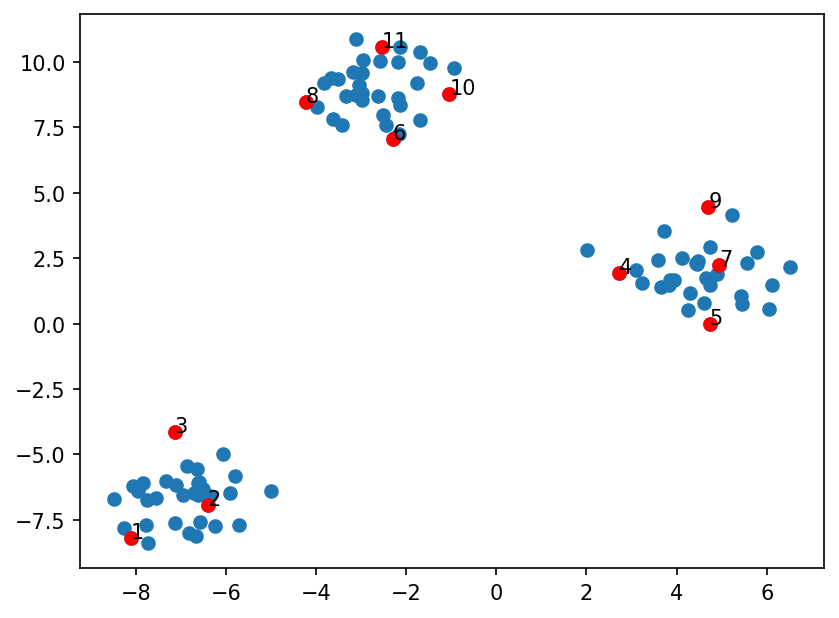

In [29]:
# diverse subset selection from randomly generated data points
selected_id5 = DirectedSphereExclusion().select(coords, 12)
# diverse subset selection from data points with obvious patterns (different clusters)
selected_id6 = DirectedSphereExclusion().select(coords_cluster, size=12)

# TODO: See why if clusters labels are provided the algorithm fails
# selected_id6 = DirectedSphereExclusion().select(coords_cluster, size=12,labels=class_labels_cluster)


graph_data(coords, selected_id5)
graph_data(coords_cluster, selected_id6)

### Grid Partitioning Method

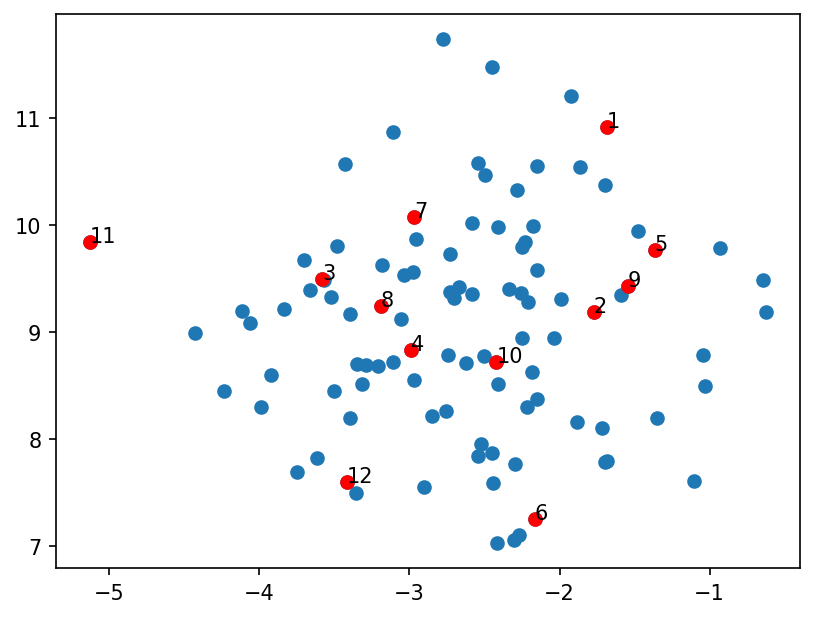

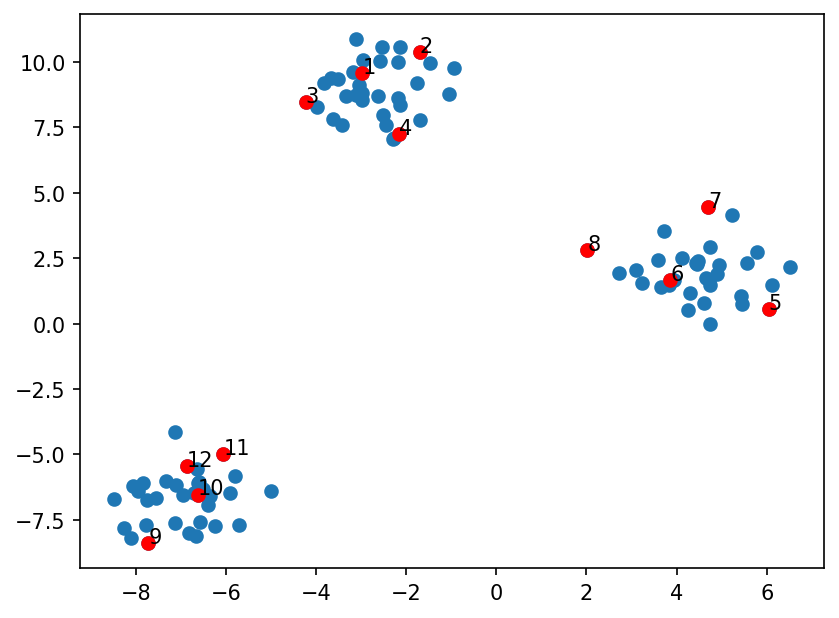

In [30]:
# diverse subset selection from randomly generated data points
selected_id7 = GridPartitioning(2, "equisized_independent").select(coords, 12)
# diverse subset selection from data points with obvious patterns (different clusters)
selected_id8 = GridPartitioning(2, "equisized_independent").select(
    coords_cluster, size=12, labels=class_labels_cluster
)

graph_data(coords, selected_id7)
graph_data(coords_cluster, selected_id8)
# 20, 5, 3, "equisized_independent"

NOTE: In the second case:

`selected_id8 = GridPartitioning(2, "equisized_independent").select(coords_cluster, size=12, labels=class_labels_cluster)`
* The method fails for any size different than 12. 
* If the labels are not provided, the method works for any size.

## MinMax selection with clusters, but without assuming there are clusters

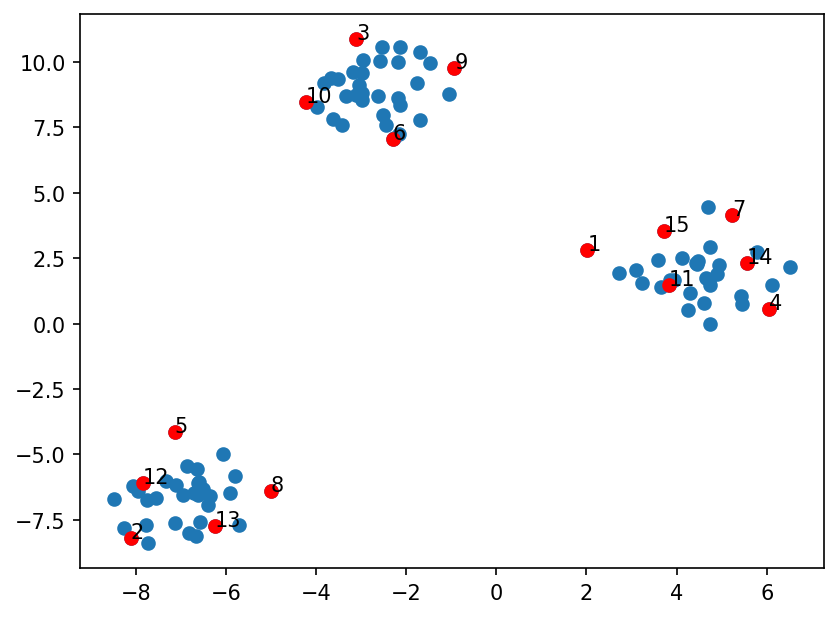

In [31]:
selector = MaxMin()
selected_ids9 = selector.select(arr=arr_dist_cluster, size=15)
graph_data(coords_cluster, selected_ids9)

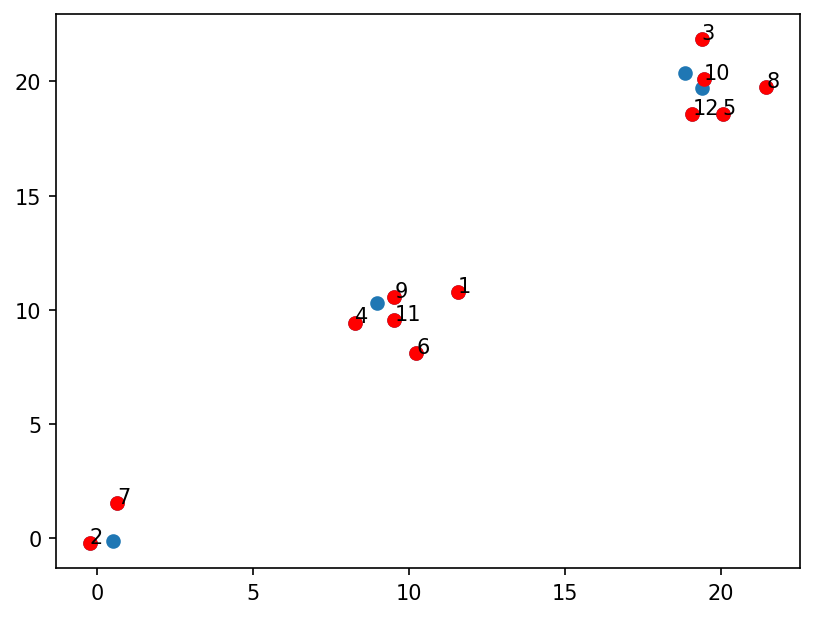

In [32]:
import numpy as np
from sklearn.metrics import pairwise_distances

np.random.seed(42)
cluster_one = np.random.normal(0, 1, (3, 2))
cluster_two = np.random.normal(10, 1, (6, 2))
cluster_three = np.random.normal(20, 1, (7, 2))
labels_mocked = np.hstack([[0 for i in range(3)], [1 for i in range(6)], [2 for i in range(7)]])

mocked_cluster_coords = np.vstack([cluster_one, cluster_two, cluster_three])
arr_dist_mocked = pairwise_distances(mocked_cluster_coords, metric="euclidean")

selector = MaxMin()
selected_mocked = selector.select(arr_dist_mocked, size=12)

graph_data(mocked_cluster_coords, selected_mocked)

### Brute Strength - maxsum

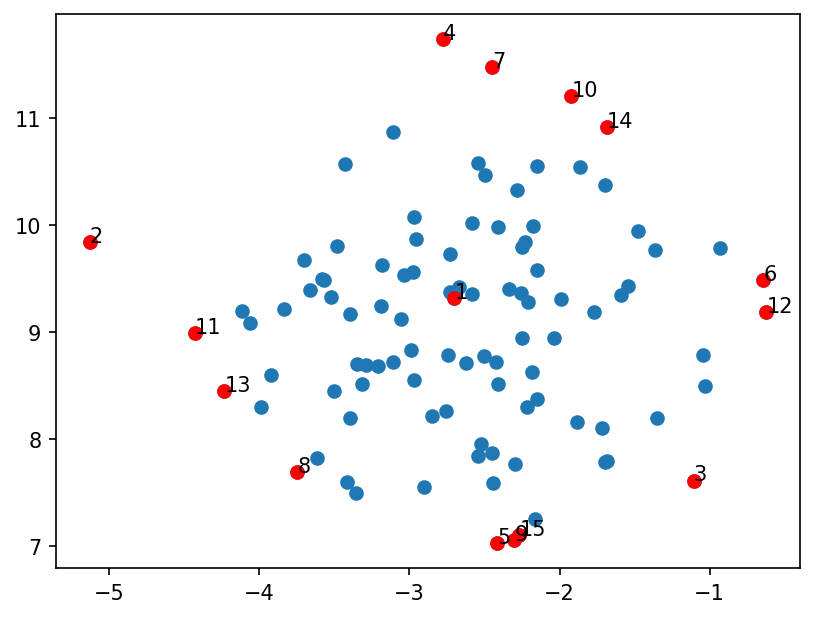

In [33]:
from DiverseSelector import dissimilarity

selector = dissimilarity.MaxSum()
selected_ids11 = selector.select(arr=arr_dist, size=15, labels=class_labels)
graph_data(coords, selected_ids11)

Note: The selection is not optimal and is very different from the previously reported for this method. 

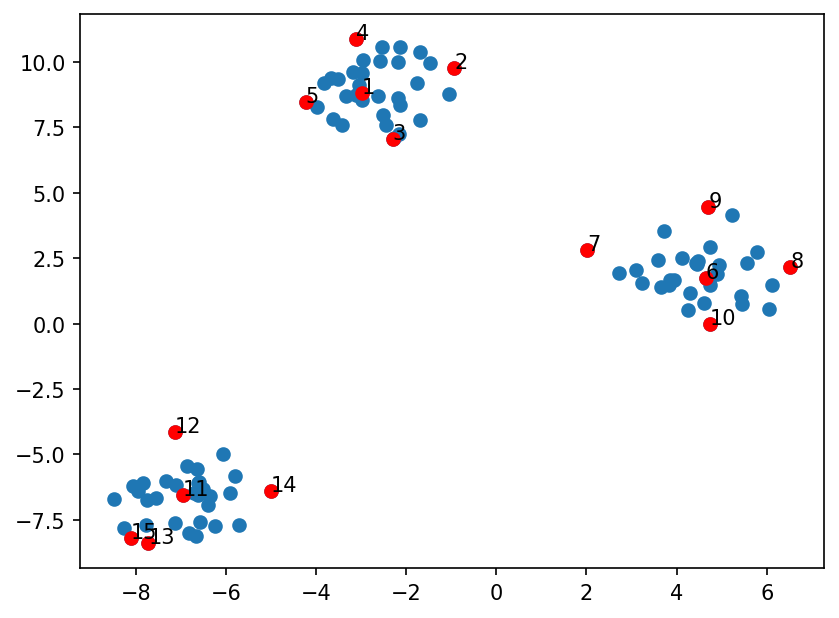

In [34]:
selected_ids12 = selector.select(arr=arr_dist_cluster, size=15, labels=class_labels_cluster)
graph_data(coords_cluster, selected_ids12)

### Grid Partitioning - Equisized Independent

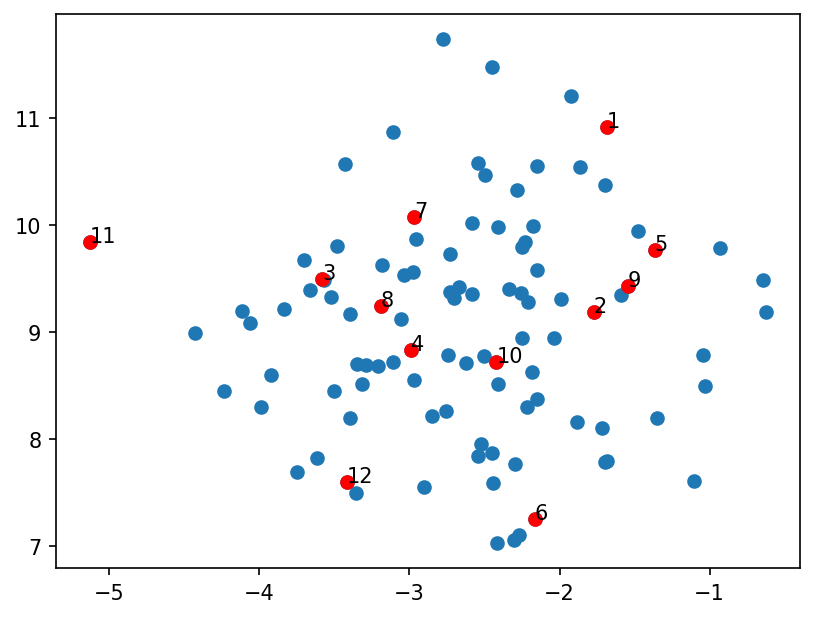

In [35]:
from DiverseSelector import partition

selector = []
selector = partition.GridPartitioning(2, grid_method="equisized_independent", random_seed=42)
selected_ids13 = selector.select(coords, size=12, labels=class_labels)
graph_data(coords, selected_ids13)

NOTE: The selected points differ from the ones in the previous version of the notebook.

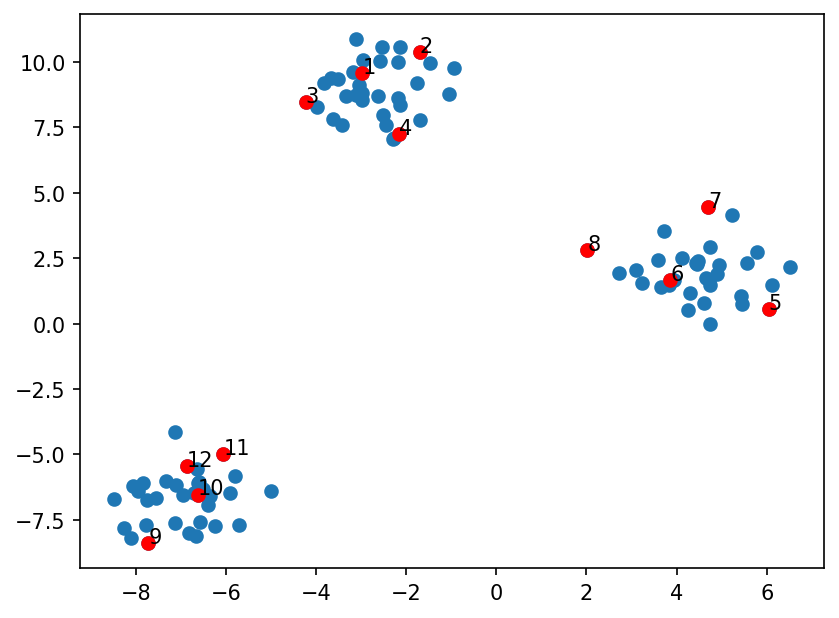

In [36]:
selected_ids14 = selector.select(coords_cluster, size=12, labels=class_labels_cluster)
graph_data(coords_cluster, selected_ids14)

### Grid Partitioning - Equisized Dependent

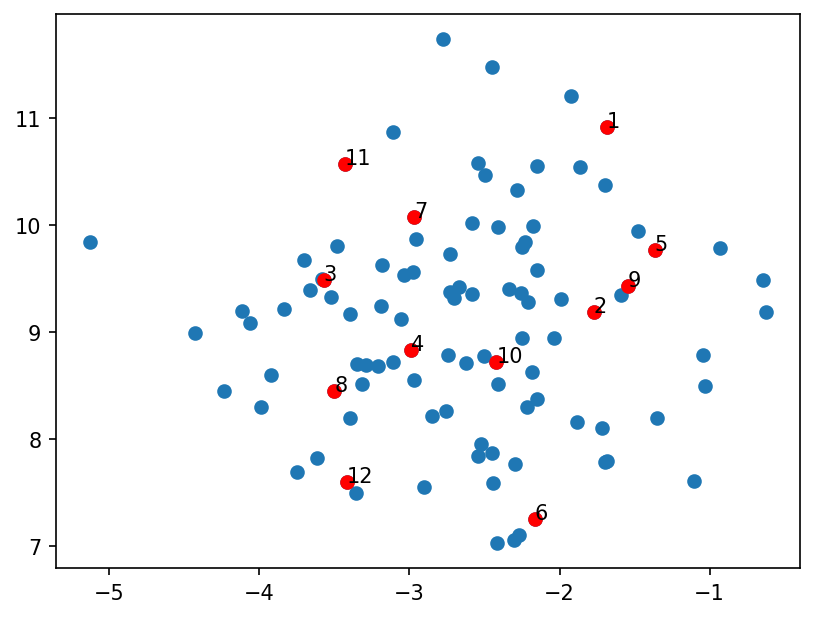

In [37]:
selector = partition.GridPartitioning(2, grid_method="equisized_dependent", random_seed=42)
selected_ids15 = selector.select(coords, size=12, labels=class_labels)
graph_data(coords, selected_ids15)

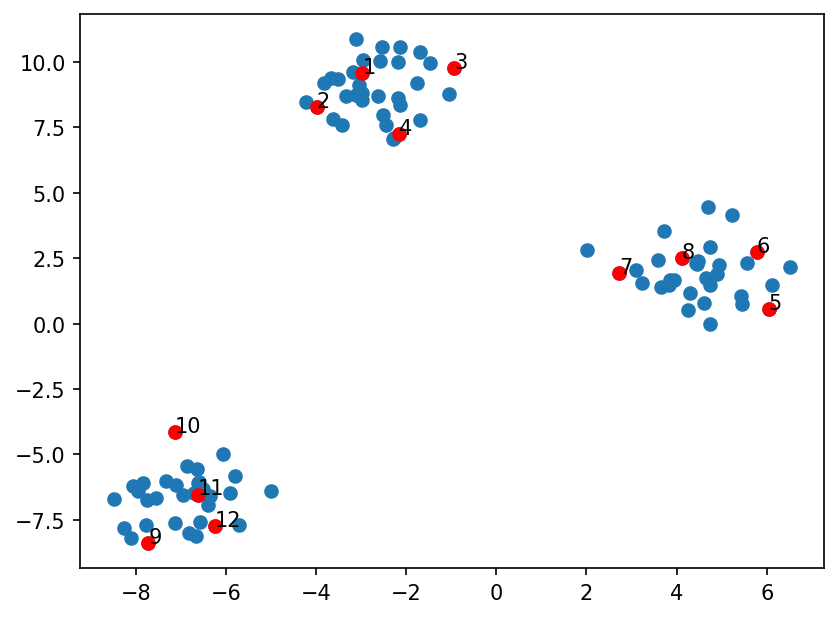

In [38]:
selected_ids16 = selector.select(coords_cluster, size=12, labels=class_labels_cluster)
graph_data(coords_cluster, selected_ids16)

### Directed Sphere Exclusion

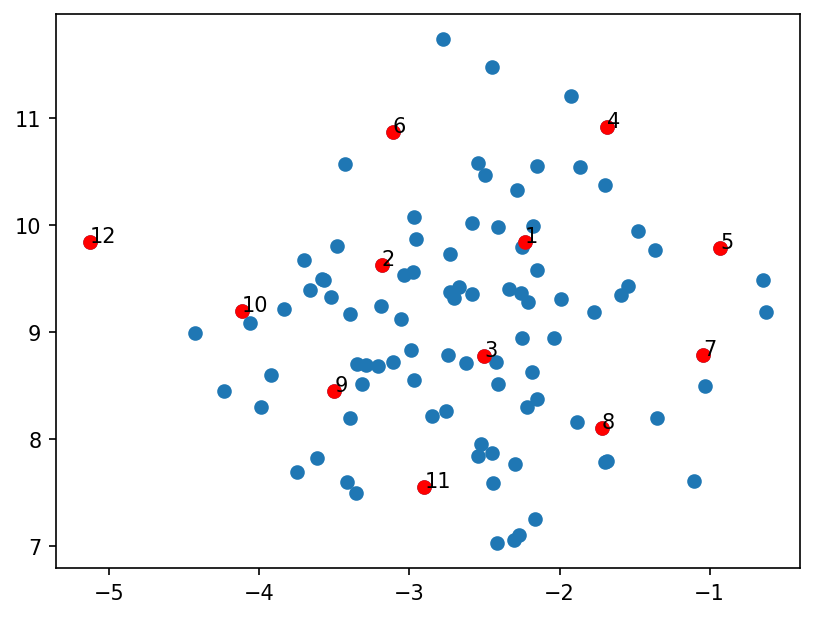

In [39]:
selector = partition.DirectedSphereExclusion()
selected_ids17 = selector.select(coords, size=12, labels=class_labels)
graph_data(coords, selected_ids17)

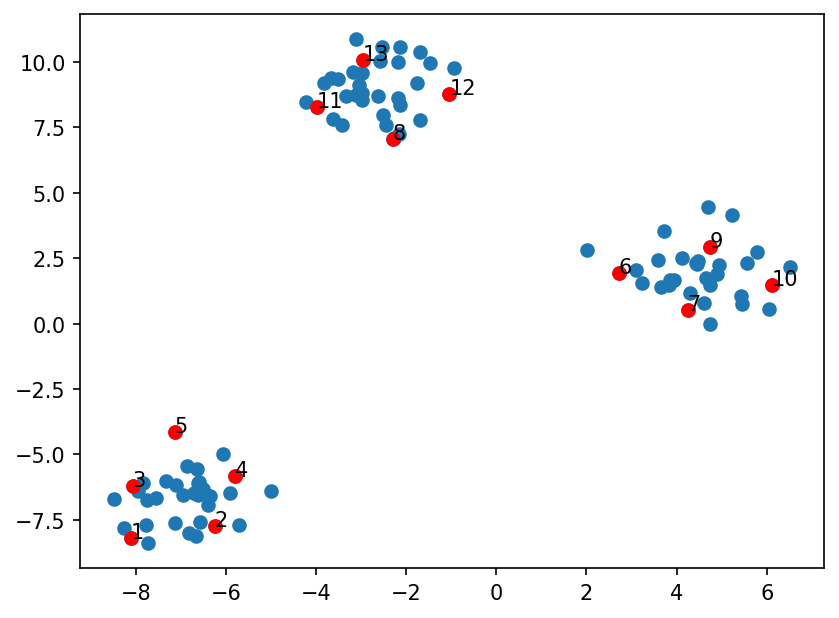

In [41]:
selected_ids18 = selector.select(coords_cluster, size=12)
graph_data(coords_cluster, selected_ids18)

# TODO: See why if clusters labels are provided the algorithm fails
# selected_ids18 = selector.select(coords_cluster, size=12,labels=class_labels_cluster)